# MODELOS DE MACHINE LEARNING


**Autor: Jenny Marisol Tenisaca Moposita**

**Importar librerias**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Conjunto con Datos método Sin Balancear
**Importar el data de entrenamientos (sin balancear) y data test**

Cargar conjuntos de entrenamiento balanceados (4 métodos) y conjunto de test. (los conjuntos de entrenamiento y test fueron dividimos en 80% y 20%)  

In [3]:
#data entrenamiento balanceado con ROSE-OVER
data_train_bal = pd.read_csv('Data_train.csv', encoding='latin-1',sep=';')
# 80% sin balancear

In [4]:
#data test
data_test = pd.read_csv('Data_test.csv',encoding='latin-1',sep=';')
# 20% de la data completa 

In [5]:
X_train=data_train_bal.iloc[:,1:23].values
y_train=data_train_bal.iloc[:,0].values
X_test=data_test.iloc[:,1:23].values
y_test=data_test.iloc[:,0].values

## Ajustar el clasificador Random Forest en el Conjunto de Entrenamiento

In [6]:
#Validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
kf =KFold(n_splits=5, shuffle=True, random_state=42)

score = cross_val_score(RandomForestClassifier(n_estimators = 100, n_jobs=2, criterion = "entropy", random_state = 123), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.7307474  0.72511826 0.73278146 0.73570178 0.72907895]
Average score: 0.7307


In [7]:
#Validación cruzada (gráfico y datos)
def graficar_Accu_scores(estimator, X_train, y_train,X_test,y_test,nparts=5,jobs=None):
    kf = KFold(n_splits=nparts,shuffle=True, random_state=42)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Acc/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Acc")    
    train_scores = cross_val_score(estimator, X_train, y_train, cv = kf, n_jobs=jobs,scoring="accuracy")
    test_scores = cross_val_score(estimator, X_test,y_test, cv = kf, n_jobs=jobs,scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

In [8]:
from sklearn.ensemble import RandomForestClassifier
clas_rndforest = RandomForestClassifier(n_estimators = 100, n_jobs=2, criterion = "entropy", random_state = 123)
clas_rndforest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=2, random_state=123)

array([0.7307474 , 0.72511826, 0.73278146, 0.73570178, 0.72907895])

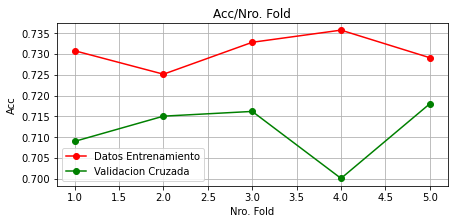

In [9]:
#Validación cruzada (gráfico y datos)
graficar_Accu_scores(clas_rndforest,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

### Predicción resultados

In [10]:
y_pred  = clas_rndforest.predict(X_test)
##matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
display(confusion_matrix(y_test, y_pred))
class_report=classification_report(y_test, y_pred)
print(class_report)


array([[17087,  2162],
       [ 4997,  2178]], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83     19249
           1       0.50      0.30      0.38      7175

    accuracy                           0.73     26424
   macro avg       0.64      0.60      0.60     26424
weighted avg       0.70      0.73      0.71     26424



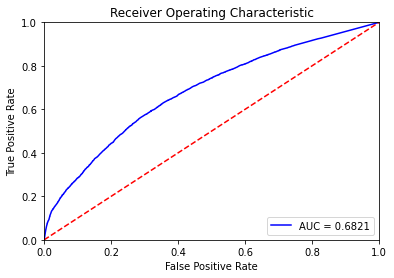

In [11]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = clas_rndforest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ajustar el clasificador NAIVE BAYES en el Conjunto de Entrenamiento

In [12]:
#validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(GaussianNB(), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.64550615 0.64858089 0.64569536 0.66464828 0.65892426]
Average score: 0.6527


In [6]:
from sklearn.naive_bayes import GaussianNB
class_nb = GaussianNB()
class_nb.fit(X_train, y_train)

GaussianNB()

array([0.64550615, 0.64858089, 0.64569536, 0.66464828, 0.65892426])

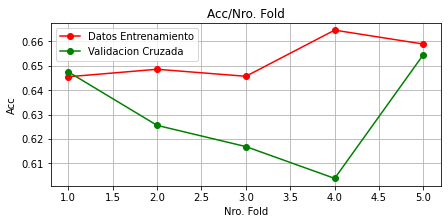

In [14]:
#Validación cruzada
graficar_Accu_scores(class_nb,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [8]:
# Predecir los resultados
y_pred_nb  = class_nb.predict(X_test)
# Matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#cm_nb = confusion_matrix(y_test, y_pred_nb)
display(confusion_matrix(y_test, y_pred_nb))
class_report=classification_report(y_test, y_pred_nb)
print(class_report)

array([[12742,  6507],
       [ 2711,  4464]], dtype=int64)

              precision    recall  f1-score   support

           0       0.82      0.66      0.73     19249
           1       0.41      0.62      0.49      7175

    accuracy                           0.65     26424
   macro avg       0.62      0.64      0.61     26424
weighted avg       0.71      0.65      0.67     26424



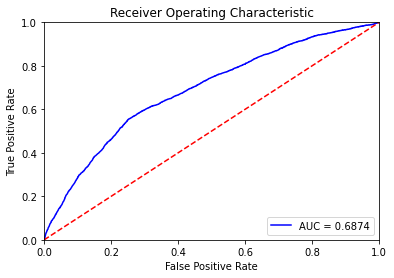

In [16]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = class_nb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc1 = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ajustar el clasificador REDES NEURONALES en el Conjunto de Entrenamiento

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [18]:
#validación cruzada (datos)
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import KFold, cross_val_score

def built_class_RN():
    #Inicializar la RNA
    class_RN = Sequential()
    #Añadir las capas de entrada y primera capa oculta
    class_RN.add(Dense(units = 12, kernel_initializer = "uniform", activation = "relu", input_dim = 23))
    #Añadir la segunda capa oculta
    class_RN.add(Dense(units = 10, kernel_initializer = "uniform",  activation = "relu"))
    #Añadir la capa de salida
    class_RN.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
    #Compilar la RNA
    class_RN.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    return class_RN

#Ajustar la RNA al Conjunto de Entrenamiento
class_RN = KerasClassifier(build_fn=built_class_RN, batch_size = 10, epochs = 100)
kf =KFold(n_splits=5, shuffle=True, random_state=42)
Accuracy = cross_val_score(class_RN, X_train, y_train, cv= kf, n_jobs=-1)


C:\Users\jenny\AppData\Local\Temp/ipykernel_11812/2278733859.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  class_RN = KerasClassifier(build_fn=built_class_RN, batch_size = 10, epochs = 100)


In [19]:
print(f'Scores for each fold are: {Accuracy}')
print(f'Average score: {"{:.4f}".format(Accuracy.mean())}')

Scores for each fold are: [0.76087987 0.76310313 0.76073796 0.76597756 0.75949669]
Average score: 0.7620


In [11]:
#Inicializar la RNA
class_RN = Sequential()
#Añadir las capas de entrada y primera capa oculta
class_RN.add(Dense(units = 12, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 23))
#Añadir la segunda capa oculta
class_RN.add(Dense(units = 10, kernel_initializer = "uniform",  activation = "relu"))
#Añadir la capa de salida
class_RN.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))
#Compilar la RNA
class_RN.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
#Ajustar la RNA al Conjunto de Entrenamiento
class_RN.fit(X_train, y_train,  batch_size = 10, epochs = 100)

Epoch 1/100
10570/10570 [==============================] - 23s 2ms/step - loss: 0.5256 - accuracy: 0.7405
Epoch 2/100
10570/10570 [==============================] - 18s 2ms/step - loss: 0.5213 - accuracy: 0.7442
Epoch 3/100
10570/10570 [==============================] - 10s 968us/step - loss: 0.5204 - accuracy: 0.7452
Epoch 4/100
10570/10570 [==============================] - 10s 919us/step - loss: 0.5200 - accuracy: 0.7454
Epoch 5/100
10570/10570 [==============================] - 12s 1ms/step - loss: 0.5194 - accuracy: 0.7458
Epoch 6/100
10570/10570 [==============================] - 12s 1ms/step - loss: 0.5191 - accuracy: 0.7459
Epoch 7/100
10570/10570 [==============================] - 12s 1ms/step - loss: 0.5186 - accuracy: 0.7468
Epoch 8/100
10570/10570 [==============================] - 11s 1ms/step - loss: 0.5179 - accuracy: 0.7468
Epoch 9/100
10570/10570 [==============================] - 11s 1ms/step - loss: 0.5170 - accuracy: 0.7483
Epoch 10/100
10570/10570 [================

In [12]:
test_loss, test_acc = class_RN.evaluate(X_test,  y_test, verbose=2)
print('\nTest Accuracy:', test_acc)

826/826 - 1s - loss: 0.5104 - accuracy: 0.7604 - 701ms/epoch - 848us/step

Test Accuracy: 0.7604072093963623


In [13]:
# Evaluar el modelo y calcular predicciones finales
# Predicción de los resultados con el Conjunto de Testing
y_pred_rn  = class_RN.predict(X_test)
y_pred_rn = (y_pred_rn>0.5)
#Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
display(confusion_matrix(y_test, y_pred_rn))
class_report=classification_report(y_test, y_pred_rn)
print(class_report)

array([[18416,   833],
       [ 5498,  1677]], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85     19249
           1       0.67      0.23      0.35      7175

    accuracy                           0.76     26424
   macro avg       0.72      0.60      0.60     26424
weighted avg       0.74      0.76      0.72     26424



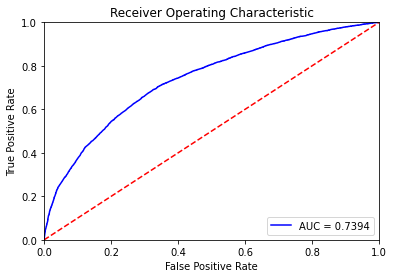

In [23]:
#Curva ROC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_rn_curv = class_RN.predict(X_test).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred_rn_curv)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(nn_fpr_keras, nn_tpr_keras, 'b', label = 'AUC = %0.4f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ajustar el clasificador SVM en el Conjunto de Entrenamiento

In [24]:
#validación cruzada (datos)
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC
kf =KFold(n_splits=5, shuffle=True, random_state=42)
score = cross_val_score(SVC(kernel='rbf',random_state=123), X_train, y_train, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.4f}".format(score.mean())}')

Scores for each fold are: [0.74271523 0.74564806 0.7486755  0.75074507 0.74194617]
Average score: 0.7459


In [26]:
# Fitting SVM to the Training set using Kernel as rbf.
from sklearn.svm import SVC
class_svm = SVC(kernel='rbf',probability=True,random_state=123)
class_svm.fit(X_train, y_train)

SVC(probability=True, random_state=123)

array([0.74271523, 0.74564806, 0.7486755 , 0.75074507, 0.74194617])

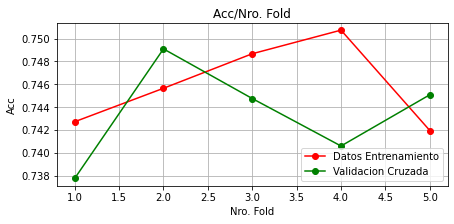

In [27]:
#Validación cruzada (gráfico y datos)
graficar_Accu_scores(class_svm,X_train,y_train,X_test,y_test,nparts=5,jobs=2)

In [28]:
#Predicción resultados
y_pred_svm  = class_svm.predict(X_test)
##matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
display(confusion_matrix(y_test, y_pred_svm))
class_report=classification_report(y_test, y_pred_svm)
print(class_report)

array([[17953,  1296],
       [ 5490,  1685]], dtype=int64)

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     19249
           1       0.57      0.23      0.33      7175

    accuracy                           0.74     26424
   macro avg       0.67      0.58      0.59     26424
weighted avg       0.71      0.74      0.70     26424



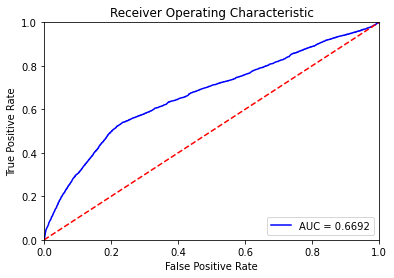

In [29]:
#Curvas ROC
import sklearn.metrics as metrics
# calcular fpr y tpr para todos los thresholds de la clasificación
probs = class_svm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()